# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muammar Faridz Dimyati]
- **Email:** [muammarfaridz99@gmail.com]
- **ID Dicoding:** [amarfaridz]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren total penggunaan sepeda pada akhir pekan (Sabtu dan Minggu) dibandingkan dengan hari-hari kerja?
- Apakah terdapat perbedaan yang signifikan dalam penggunaan sepeda antara musim dingin, musim semi, musim panas, dan musim gugur?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda yang terdaftar (registered) dan pengguna sepeda yang tidak terdaftar (casual)?

## Import Semua Packages/Library yang Digunakan

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

Pada tahap ini menggunakan dataset yang disediakan oleh Kaggle dengan judul "Bike Sharing Dataset" yang memiliki 2 data yaitu day.csv dan hour.csv. Namun kali ini saya menggunakan data day.csv saja

In [124]:
day = pd.read_csv('./data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuat dataframe bernama day dengan melakukan read dari data day.csv dan menampilkan tabel 5 baris pertama

### Assessing Data

In [125]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melakukan cek pada tiap kolom yang ada di day

In [126]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melakukan cek pada tiap kolom apakah ada data yang kosong/ bernilai null

In [127]:
print("data yang duplikat: ", day.duplicated().sum())

data yang duplikat:  0


Melakukan cek apakah data ad yang duplikat

### Cleaning Data

Day

In [128]:
day['dteday'] = pd.to_datetime(day['dteday'])
day['season'] = day['season'].astype('category')
day['mnth'] = day['mnth'].astype('category')
day['holiday'] = day['holiday'].astype('category')
day['weekday'] = day['weekday'].astype('category')
day['workingday'] = day['workingday'].astype('category')
day['weathersit'] = day['weathersit'].astype('category')
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

Mengubah tipe data setiap data, misal dteday yang semula objek menjadi datetime

In [129]:
# Mengonversi data pada kolom kategori variabel berdasarkan kriteria 
# yang ditunjukkan pada file readme.txt

# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
day.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
day.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_Snow','Heavy_Rain'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
day.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

Mengubah nama setiap data,untuk mempermudah dalam pembacaan

In [130]:
# Merubah nama kolom

day.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [131]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

day['temp'] = day['temp']*41
day['atemp'] = day['atemp']*50
day['humidity'] = day['humidity']*100
day['windspeed'] = day['windspeed']*67

Mengkonversi nilai dari data yang belum dinormalisasi sesuai dengan petunjuk pada readme di dataset kaggle

In [132]:
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [133]:
drop_col = ['instant', 'windspeed']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)

day.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,82,1518,1600


Menghapus kolom yang tidak diperlukan

## Exploratory Data Analysis (EDA)

### Explore Day

In [134]:
day['is_weekend'] = day['date'].dt.dayofweek.isin([5, 6])

weekend_mean = day[day['is_weekend']]['total_count'].mean()
weekday_mean = day[~day['is_weekend']]['total_count'].mean()

print("Mean total count for weekends:", weekend_mean)
print("Mean total count for weekdays:", weekday_mean)

day.head()

Mean total count for weekends: 4389.685714285714
Mean total count for weekdays: 4550.5662188099805


,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,casual,registered,total_count,is_weekend
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,331,654,985,True
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,131,670,801,True
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,120,1229,1349,False
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,108,1454,1562,False
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,82,1518,1600,False


Melakukan perhitungan rata-rata penggunaan sepeda pada weekend  dan weekday

In [135]:
# Menghitung total_count untuk setiap hari
day['total_count'] = day['casual'] + day['registered']

# Mengelompokkan berdasarkan hari dan menghitung total sepeda yang disewa pada setiap hari
season_counts = day.groupby('season')['total_count'].sum().reset_index()

print(season_counts)

   season  total_count
0  Winter       471348
1  Spring       918589
2  Summer      1061129
3    Fall       841613


Mendapatkn data penggunaan sepeda sesuai dengan masing-masing musim

In [153]:
# Menghitung total_count untuk setiap hari
day['total_count_casual'] = day['casual']

# Mengelompokkan berdasarkan hari dan menghitung total sepeda yang disewa pada setiap hari
weather_counts_casual = day.groupby('weather')['casual'].sum().reset_index()

weather_counts_regist = day.groupby('weather')['registered'].sum().reset_index()

print(weather_counts_casual)
print(weather_counts_regist)

      weather  casual
0       Clear  446346
1       Misty  169776
2  Light_Snow    3895
      weather  registered
0       Clear     1811606
1       Misty      827082
2  Light_Snow       33974


Melakukan perhitungan penggunaan sepeda sesuai dengan cuaca masing-masing, serta memisahkan berdasarkan pengguna sepeda registered dan pngguna sepeda casual

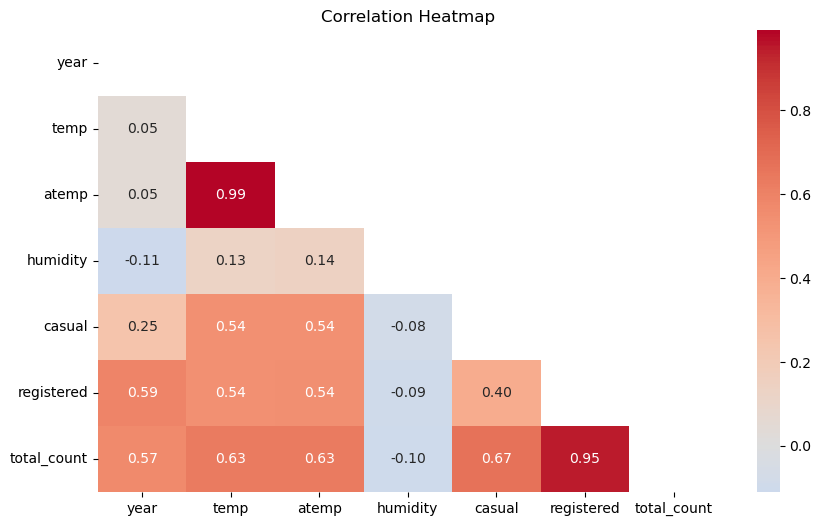

In [137]:
drop_col = ['is_weekend']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)


fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil korelasi heatmap di atas, didapat pernyataan sebagai berikut:

- atemp dan temp sangat berkorelasi karena memiliki value sebesar (0.99).
- humidity memiliki korelasi lemah dengan temperature dan atemp yang memiliki value sebesar(0.13 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).

In [159]:
day.to_csv('./dashboard/main_data.csv', index=False)

Data yang sudah dianalisis akan dikonversi menjadi csv yang akan digunakan ke dalam streamlit

## Visualization & Explanatory Analysis

### Pertanyaan 1:

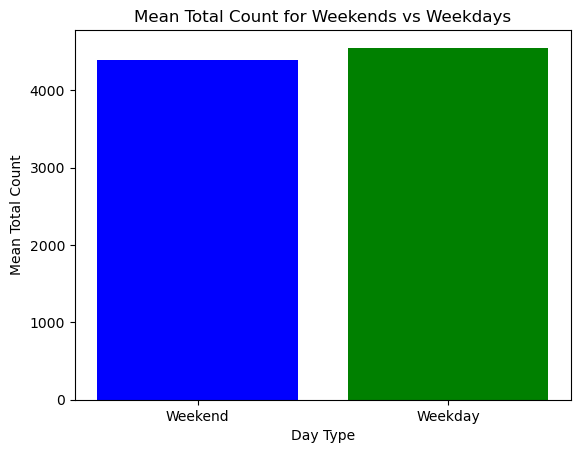

In [138]:
plt.bar(['Weekend', 'Weekday'], [weekend_mean, weekday_mean], color=['blue', 'green'])
plt.xlabel('Day Type')
plt.ylabel('Mean Total Count')
plt.title('Mean Total Count for Weekends vs Weekdays')
plt.show()

Berdasarkan grafik bar di atas menampilkan bahwa pegguna sepeda pada weekday lebih banyak daripada pengguna sepeda pada weekend. Hal ini dapat disimpulkan bahwa penggunaan sepeda paling banyak diminati ada pada hari weekday

### Pertanyaan 2:

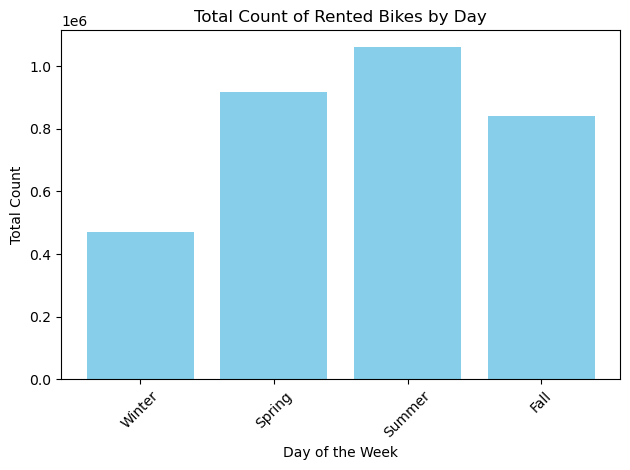

In [139]:
# Visualisasi
plt.bar(season_counts['season'], season_counts['total_count'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Count')
plt.title('Total Count of Rented Bikes by Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan grafik bar di atas jumlah penguna sepeda paling banyak ada di musim panas atau `summer`. Kondisi musim panas menjadi musim yang paling banyak diminati, diikuti dengan musim semi dan musim gugur.

### Pertanyaan 3:

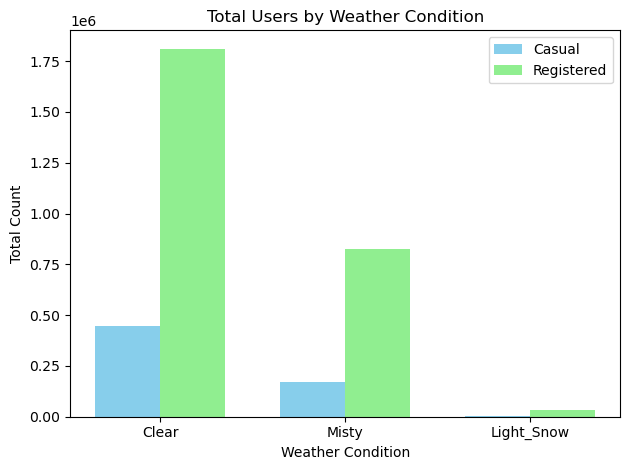

In [158]:
# Membuat posisi untuk setiap grup data
bar_width = 0.35
index = np.arange(len(weather_counts_casual))

# Visualisasi
plt.bar(index, weather_counts_casual['casual'], bar_width, color='skyblue', label='Casual')
plt.bar(index + bar_width, weather_counts_regist['registered'], bar_width, color='lightgreen', label='Registered')

# Menyesuaikan label sumbu x
plt.xlabel('Weather Condition')
plt.ylabel('Total Count')
plt.title('Total Users by Weather Condition')
plt.xticks(index + bar_width / 2, weather_counts_casual['weather'])

# Menambahkan legenda
plt.legend()

plt.tight_layout()
plt.show()

Berdasarkan grafik bar di atas, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah menjadi kondisi yang paling diminati

## Conclusion

### Kesimpulan pertanyaan 1

Berdasarkan analisis data, dapat disimpulkan bahwa tren total penggunaan sepeda pada hari kerja lebih tinggi dibandingkan dengan akhir pekan (Sabtu dan Minggu). Meskipun demikian, perlu diingat bahwa penggunaan sepeda pada akhir pekan juga cukup signifikan. Oleh karena itu, sementara hari kerja menjadi momen utama dalam peminjaman sepeda, akhir pekan tetap menjadi waktu yang penting dalam penggunaan sepeda. Hal ini menunjukkan bahwa kegiatan penggunaan sepeda tidak hanya terpusat pada hari-hari kerja tetapi juga berlangsung secara signifikan pada akhir pekan.

### Kesimpulan pertantanyaan 2

Berdasarkan analisis data, terdapat perbedaan yang signifikan dalam penggunaan sepeda antara musim dingin, musim semi, musim panas, dan musim gugur. Dapat disimpulkan bahwa penggunaan sepeda cenderung lebih tinggi selama musim panas dibandingkan dengan musim lainnya. Hal ini masuk akal karena cuaca yang lebih hangat dan kondisi yang lebih nyaman secara umum membuat orang lebih cenderung untuk menggunakan sepeda. Meskipun demikian, penggunaan sepeda tetap terjadi sepanjang tahun, meskipun mungkin dalam skala yang lebih kecil selama musim dingin. Ini menunjukkan bahwa meskipun musim panas memiliki jumlah peminjaman sepeda yang lebih tinggi, sepeda tetap merupakan pilihan transportasi yang populer sepanjang tahun.

### Kesimpulan Pertanyaan 3

Berdasarkan analisis data, terlihat bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda yang terdaftar (registered) dan pengguna sepeda yang tidak terdaftar (casual). Dapat disimpulkan bahwa pada hari-hari dengan kondisi cuaca yang cerah (clear), jumlah pengguna sepeda cenderung lebih tinggi, baik untuk pengguna terdaftar maupun casual. Hal ini menunjukkan bahwa cuaca yang cerah mendorong orang untuk lebih aktif menggunakan sepeda sebagai pilihan transportasi.

Selain itu, terlihat bahwa jumlah pengguna sepeda yang terdaftar (registered) cenderung lebih tinggi daripada pengguna sepeda yang tidak terdaftar (casual), terutama pada hari-hari dengan kondisi cuaca yang baik. Hal ini menunjukkan bahwa pengguna sepeda yang terdaftar mungkin lebih konsisten dalam penggunaan sepeda mereka, sementara pengguna sepeda yang tidak terdaftar cenderung lebih dipengaruhi oleh faktor cuaca atau keadaan tertentu dalam memilih untuk menggunakan sepeda.